In [53]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import os
import matplotlib.pyplot as pl

In [24]:
%matplotlib inline

In [72]:
HOME = os.getenv('HOME')
fp1 = os.path.join(HOME,'Datafiles/Beaching/Chlorophyll/SeaWiFS_Chlor_1999-2007_ROI_2.txt')
fp2 = os.path.join(HOME,'Datafiles/Beaching/Chlorophyll/AquaMODIS_Chlor_2008-2014_ROI_2.txt')

In [73]:
dfSwf = pd.read_csv(fp1, delim_whitespace=True, parse_dates=[[0, 1, 2]],
                    infer_datetime_format=True, index_col=0)

In [74]:
dfSwf.head()

,Average,SD,Median,Min,Max,Skewness,Kurtosis,N_valid
Year_Month_Day,,,,,,,,
1999-01-04,1.2378,1.2588,0.9225,0.3737,20.9928,10.3984,144.6777,1165.0
1999-01-12,2.4082,1.2551,2.2749,0.2110,8.7793,0.8473,1.6873,282.0
1999-01-20,1.1301,0.7616,0.7715,0.3518,10.6451,2.4947,14.0132,2471.0
1999-01-28,1.1529,0.8846,0.8153,0.2516,11.3077,4.4592,37.8025,1904.0
1999-02-05,0.9816,0.6491,0.7297,0.3633,9.1623,3.5230,25.0960,1166.0


In [75]:
dfSwf.tail()

,Average,SD,Median,Min,Max,Skewness,Kurtosis,N_valid
Year_Month_Day,,,,,,,,
2007-11-28,2.1980,1.4251,1.9060,0.4892,15.2055,2.9788,19.5617,728.0
2007-12-06,1.5926,0.9521,1.3302,0.2646,5.8370,1.0874,1.1807,481.0
2007-12-14,1.6077,1.0861,1.3549,0.2045,13.9152,3.6369,30.0747,651.0
2007-12-22,1.5161,0.8515,1.2898,0.3671,6.2279,1.1673,1.5931,1134.0
2007-12-29,1.0529,0.7274,0.8469,0.1833,9.2944,3.3044,27.3908,1208.0


In [77]:
dfSwf.N_valid.min()

100.0

In [22]:
dfSwf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414 entries, 1999-01-04 to 2007-12-29
Data columns (total 8 columns):
Average     414 non-null float64
SD          414 non-null float64
Median      414 non-null float64
Min         414 non-null float64
Max         414 non-null float64
Skewness    414 non-null float64
Kurtosis    414 non-null float64
N_valid     414 non-null float64
dtypes: float64(8)
memory usage: 29.1 KB


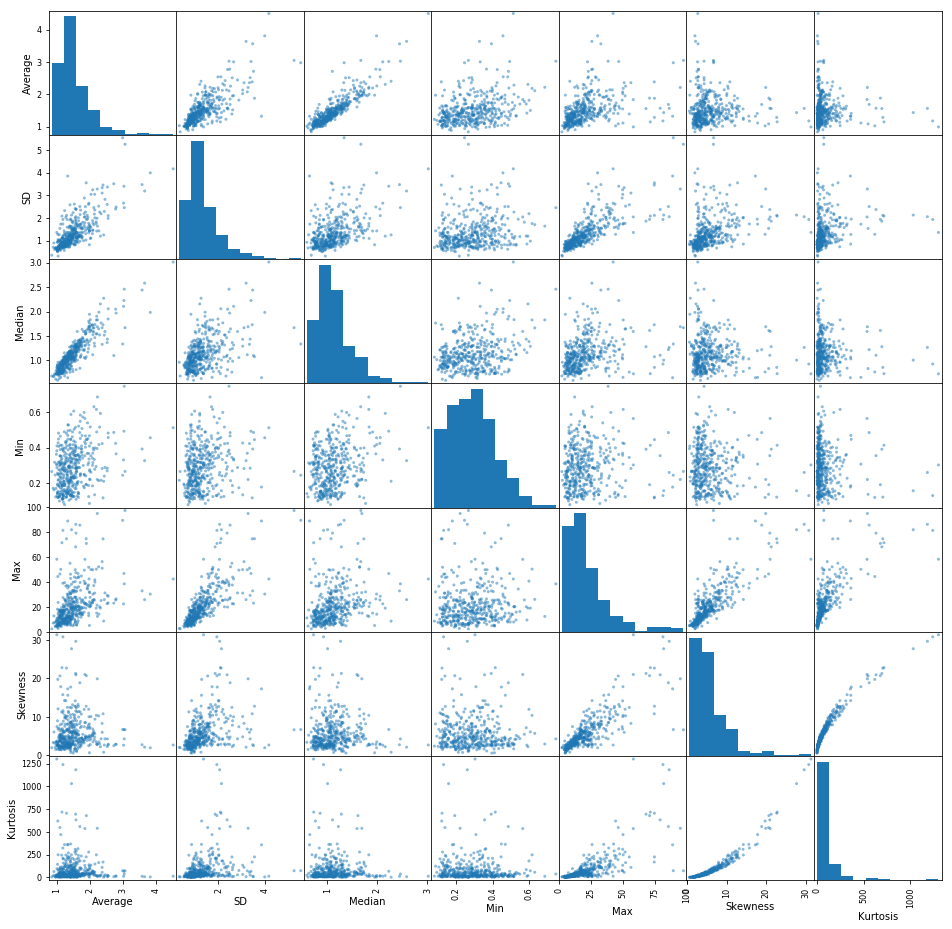

In [28]:
scatter_matrix(dfSwf.drop('N_valid', axis=1), figsize=(16,16));

In [29]:
dfSwf = dfSwf[['Median', 'Min', 'Max']]

In [31]:
dfSwf.describe()

,Median,Min,Max
count,414.000000,414.000000,414.000000
mean,1.142102,0.290690,21.980731
std,0.344341,0.122039,16.433205
min,0.593900,0.079100,2.585200
25%,0.898425,0.194000,11.065675
50%,1.075300,0.282350,17.604250
75%,1.294850,0.369000,26.426325
max,3.016500,0.747600,97.516600


In [37]:
dfSwfDaily = dfSwf.resample('D').interpolate(method='linear')

In [38]:
dfSwfDaily.head()

,Median,Min,Max
Year_Month_Day,,,
1999-01-04,0.92250,0.373700,20.992800
1999-01-05,1.09155,0.353362,19.466112
1999-01-06,1.26060,0.333025,17.939425
1999-01-07,1.42965,0.312688,16.412737
1999-01-08,1.59870,0.292350,14.886050


In [39]:
dfSwfDaily.tail()

,Median,Min,Max
Year_Month_Day,,,
2007-12-25,1.099986,0.288329,7.542114
2007-12-26,1.036714,0.262071,7.980186
2007-12-27,0.973443,0.235814,8.418257
2007-12-28,0.910171,0.209557,8.856329
2007-12-29,0.846900,0.183300,9.294400


In [42]:
dfAqu = pd.read_csv(fp2, parse_dates=[[0, 1, 2]], infer_datetime_format=True,
                    delim_whitespace=True, index_col=0)

In [43]:
dfAqu.head()

,Average,SD,Median,Min,Max,Skewness,Kurtosis,N_valid
Year_Month_Day,,,,,,,,
2008-01-04,1.2297,1.7031,0.8669,0.1879,49.5012,17.2607,431.8956,2041.0
2008-01-12,1.2442,1.1230,0.8549,0.3158,16.8386,5.6246,50.6188,2471.0
2008-01-20,1.4193,1.1292,1.0111,0.4251,16.5740,3.8700,29.1044,1974.0
2008-01-28,1.3665,1.2282,0.8625,0.3725,19.6002,4.3290,34.6210,2448.0
2008-02-05,1.2505,1.0818,0.8073,0.3338,8.6644,3.1648,12.2343,2356.0


In [44]:
dfAqu = dfAqu[['Median', 'Min', 'Max']]
dfAqu.head()

,Median,Min,Max
Year_Month_Day,,,
2008-01-04,0.8669,0.1879,49.5012
2008-01-12,0.8549,0.3158,16.8386
2008-01-20,1.0111,0.4251,16.5740
2008-01-28,0.8625,0.3725,19.6002
2008-02-05,0.8073,0.3338,8.6644


In [45]:
dfChl = pd.concat((dfSwf, dfAqu))

In [46]:
dfChl.head()

,Median,Min,Max
Year_Month_Day,,,
1999-01-04,0.9225,0.3737,20.9928
1999-01-12,2.2749,0.2110,8.7793
1999-01-20,0.7715,0.3518,10.6451
1999-01-28,0.8153,0.2516,11.3077
1999-02-05,0.7297,0.3633,9.1623


In [47]:
dfChl.tail()

,Median,Min,Max
Year_Month_Day,,,
2014-11-28,1.3320,0.2027,17.5100
2014-12-06,1.6504,0.3601,23.0784
2014-12-14,1.1175,0.2287,6.5881
2014-12-22,1.0745,0.2734,18.7129
2014-12-29,1.2115,0.3032,20.0688


In [48]:
date_index = pd.date_range(start='1999-01-01', end='2014-12-31')

In [52]:
dfChl = dfChl.reindex(index=date_index).interpolate(method='spline', order=1)

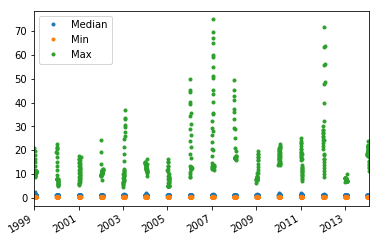

In [58]:
dfChl.loc[dfChl.index.month==1,:].plot(kind='line', marker='.', ls='')

In [61]:
dfChl.iloc[3:31].median(axis=0)

Median     1.070506
Min        0.278428
Max       10.841672
dtype: float64

In [67]:
for i in range(0, 3):
    dfChl.iloc[i,:] = dfChl.iloc[3:31].median(axis=0)


In [68]:
dfChl.head()

,Median,Min,Max
1999-01-01,1.070506,0.278428,10.841672
1999-01-02,1.070506,0.278428,10.841672
1999-01-03,1.070506,0.278428,10.841672
1999-01-04,0.922500,0.373700,20.992800
1999-01-05,1.069919,0.278367,19.459769


In [64]:
dfChl.describe()

,Median,Min,Max
count,5841.000000,5841.000000,5841.000000
mean,1.218975,0.292628,30.661232
std,0.169997,0.044464,21.653575
min,0.593900,0.079100,1.735300
25%,1.133698,0.284396,14.282343
50%,1.214584,0.292428,23.392800
75%,1.296440,0.300500,41.754720
max,6.652800,0.747600,99.610400


In [69]:
dfChl.to_pickle('../PklJar/dfChl.pkl')